## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[181.5  175.5  179.5 ]
   [175.   169.   173.  ]
   [172.25 166.25 170.25]
   ...
   [140.75 134.75 138.75]
   [153.25 147.25 151.25]
   [150.75 144.75 148.75]]

  [[175.   169.   173.  ]
   [176.75 170.75 174.75]
   [176.75 170.75 174.75]
   ...
   [147.25 141.25 145.25]
   [149.5  143.5  147.5 ]
   [161.   155.   159.  ]]

  [[175.25 169.25 173.25]
   [177.75 171.75 175.75]
   [178.5  172.5  176.5 ]
   ...
   [155.25 149.25 153.25]
   [155.   149.   153.  ]
   [145.25 139.25 143.25]]

  ...

  [[147.25 138.25 141.25]
   [152.25 143.25 146.25]
   [143.5  134.5  137.5 ]
   ...
   [144.5  134.5  133.5 ]
   [145.   135.   134.  ]
   [141.   131.   130.  ]]

  [[163.25 154.25 157.25]
   [149.75 140.75 143.75]
   [148.25 139.25 142.25]
   ...
   [141.75 131.75 130.75]
   [153.   143.   142.  ]
   [143.25 133.25 132.25]]

  [[155.5  146.5  149.5 ]
   [155.   146.   149.  ]
   [149.   140.   143.  ]
   ...
   [129.25 119.25 118.25]
   [139.5  129.5  128.5 ]
   [140.5  130.5  12

## Building Model

### To avoid Overshooting
1. Choose small learning rate, default is 0.001 and we using 0.0001
2. There may be chaance for underfitting, We increase the number of neuron
3. Add more convolution layer to capture more feature from the images, there may be possibility that
the model is not able to capture relevant features or the model gets confused due to lack of features,
so feed more features

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### Building Convolution Model

In [8]:
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.40))

In [17]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 240s 86ms/step - loss: 1.4323 - accuracy: 0.5832 - val_loss: 0.5006 - val_accuracy: 0.8367
Epoch 2/10
2197/2197 [==============================] - 220s 100ms/step - loss: 0.4558 - accuracy: 0.8557 - val_loss: 0.3350 - val_accuracy: 0.8922
Epoch 3/10
2197/2197 [==============================] - 275s 125ms/step - loss: 0.2710 - accuracy: 0.9120 - val_loss: 0.2490 - val_accuracy: 0.9181
Epoch 4/10
2197/2197 [==============================] - 308s 140ms/step - loss: 0.1877 - accuracy: 0.9394 - val_loss: 0.1654 - val_accuracy: 0.9461
Epoch 5/10
2197/2197 [==============================] - 371s 169ms/step - loss: 0.1419 - accuracy: 0.9544 - val_loss: 0.1502 - val_accuracy: 0.9520
Epoch 6/10
2197/2197 [==============================] - 379s 172ms/step - loss: 0.1078 - accuracy: 0.9646 - val_loss: 0.1251 - val_accuracy: 0.9613
Epoch 7/10
2197/2197 [==============================] - 389s 177ms/step - loss: 0.0864 - accuracy: 0.9716 - val_l

### Model Evaluation

In [21]:
# model evaluation oon training set 
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 137s 63ms/step - loss: 0.0313 - accuracy: 0.9898


In [22]:
print(train_loss,train_acc)

0.031275901943445206 0.9898285865783691


In [23]:
# model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 34s 62ms/step - loss: 0.1196 - accuracy: 0.9641


In [24]:
print(val_loss,val_acc)

0.11962790787220001 0.9641475081443787


### Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [1.4322519302368164,
  0.455756813287735,
  0.2710009813308716,
  0.18767063319683075,
  0.1419302374124527,
  0.10781723260879517,
  0.08640515059232712,
  0.07469439506530762,
  0.06640514731407166,
  0.055695198476314545],
 'accuracy': [0.5831709504127502,
  0.855665385723114,
  0.9119994044303894,
  0.9394267201423645,
  0.9544206261634827,
  0.9645636081695557,
  0.9716480374336243,
  0.9756881594657898,
  0.978704035282135,
  0.9819759726524353],
 'val_loss': [0.5005572438240051,
  0.335024356842041,
  0.2489575743675232,
  0.16537003219127655,
  0.15023022890090942,
  0.12508317828178406,
  0.12479134649038315,
  0.12945793569087982,
  0.11048687994480133,
  0.11962783336639404],
 'val_accuracy': [0.8367288708686829,
  0.8922148942947388,
  0.918108344078064,
  0.9460505247116089,
  0.9519690275192261,
  0.9613020420074463,
  0.9588549733161926,
  0.9610744118690491,
  0.9653425812721252,
  0.9641475081443787]}

In [27]:
# recording history in json
import json
with open ("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

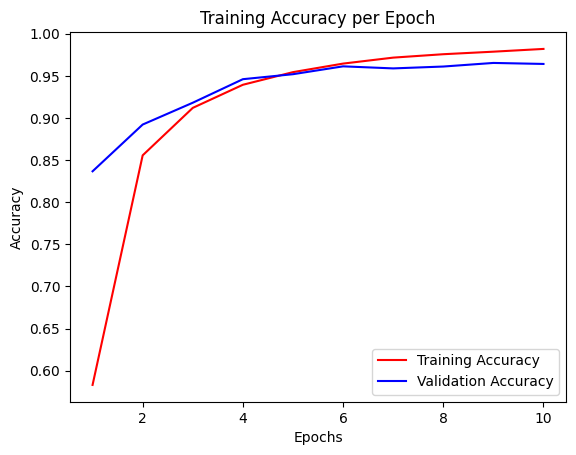

In [28]:
epochs = list(range(1, 11))  # Convert the range to a list instead of a generator
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')  # Adds x-axis label
plt.ylabel('Accuracy')  # Adds y-axis label
plt.title('Training Accuracy per Epoch')  # Adds title
plt.legend()  # Display legend  
plt.show()


### Some other metrics for Model Evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 32s 58ms/step


(array([[9.99999285e-01, 1.88299495e-07, 1.75891524e-10, ...,
         2.61403341e-16, 3.39814033e-14, 9.35430227e-13],
        [9.99906898e-01, 2.07739254e-06, 1.05668668e-07, ...,
         1.69723307e-12, 1.75142730e-11, 6.54011956e-10],
        [1.00000000e+00, 4.54730004e-12, 2.57880544e-12, ...,
         3.67032239e-19, 2.82340533e-17, 1.27176856e-14],
        ...,
        [4.54763787e-12, 4.71504448e-15, 1.91988675e-10, ...,
         3.06895487e-13, 4.78445917e-14, 1.00000000e+00],
        [2.30364150e-09, 1.27971462e-12, 2.61223532e-09, ...,
         3.83741844e-10, 3.94801518e-11, 9.99994397e-01],
        [1.94653227e-16, 2.23932449e-17, 6.04284214e-14, ...,
         9.23621402e-17, 6.44381320e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [32]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(len(class_name))


38


In [38]:
import numpy as np

# Convert Y_true to a numpy array if it's a TensorFlow tensor
if isinstance(Y_true, tf.Tensor):
    Y_true = Y_true.numpy()

# Debugging the lengths
print(f"Number of classes in Y_true: {len(np.unique(Y_true))}")  # Use np.unique instead of set for arrays
print(f"Number of target_names: {len(class_name)}")


Number of classes in Y_true: 38
Number of target_names: 38


In [39]:


print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.94      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.93      0.

In [40]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[482,   3,   0, ...,   0,   0,   0],
       [  0, 491,   0, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 432,   0],
       [  0,   0,   0, ...,   0,   0, 477]], dtype=int64)

### Confusion Matrix Visualization

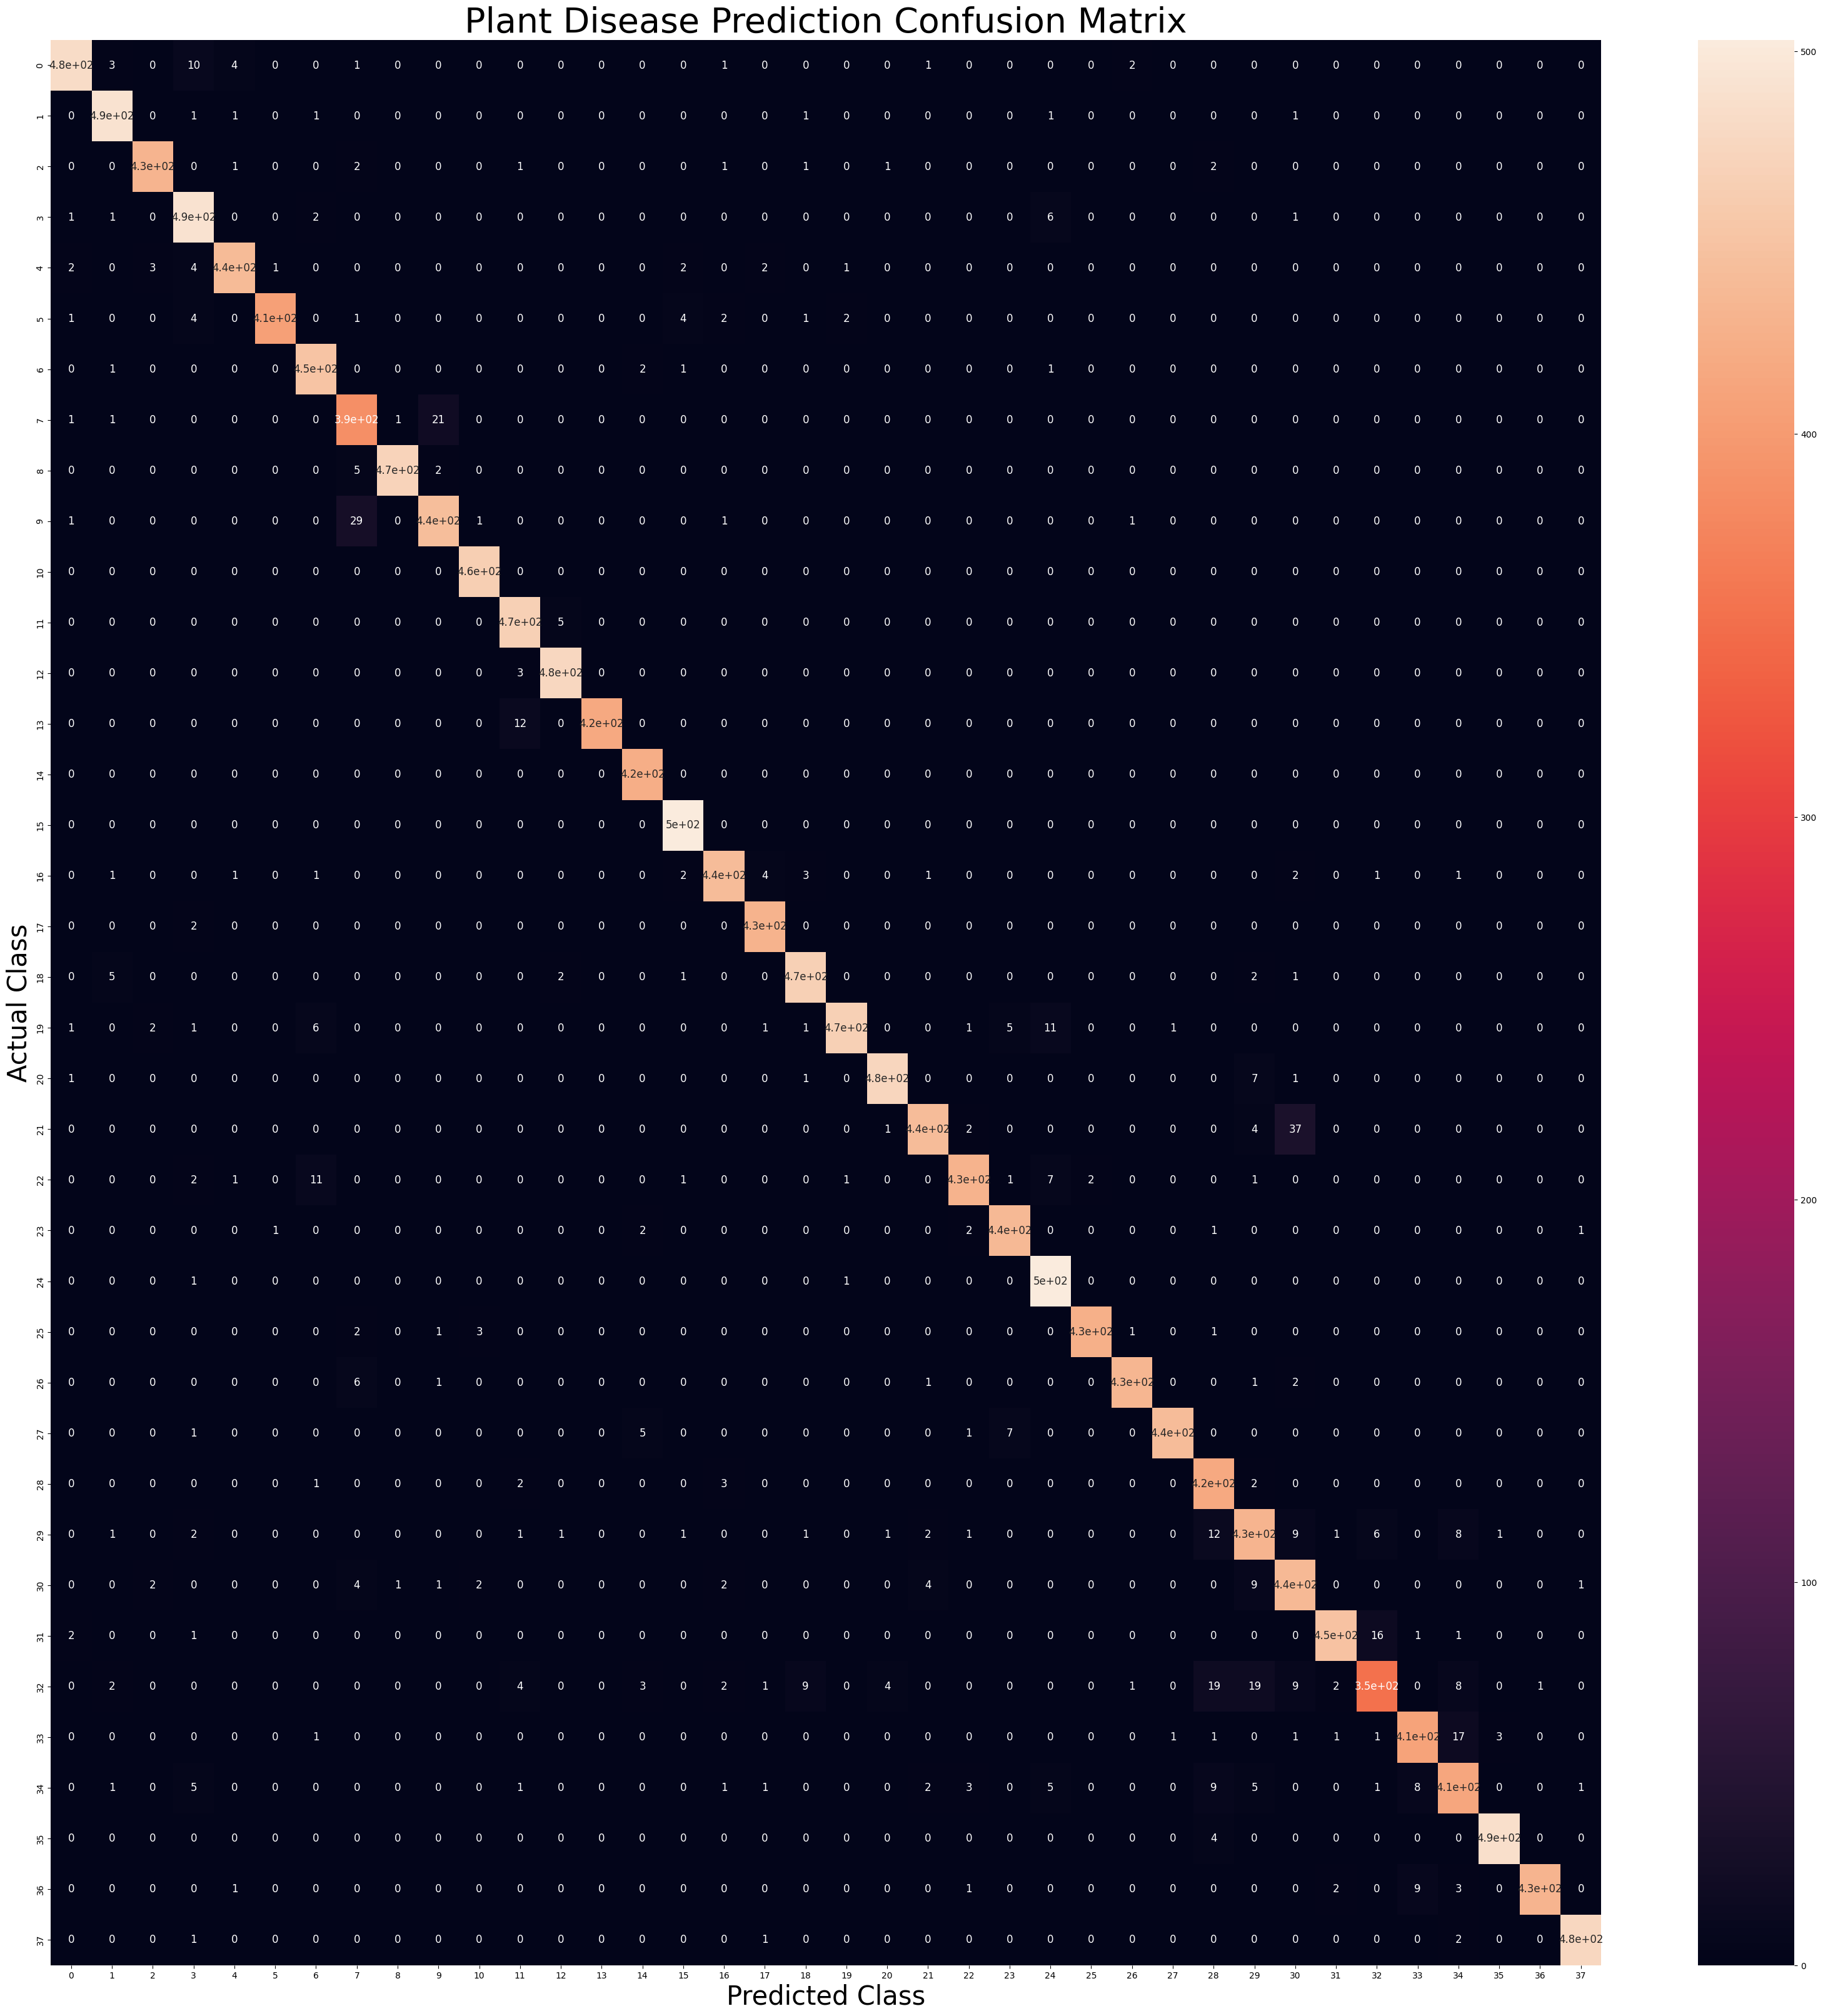

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':12})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=40)
plt.show()